# Laboratory Work #3
**Topic**: Using Pandas for Data Analysis <br>
**Objective**: Learn the basic functions of Pandas for data analysis.

Dataset with U.S. baby names over the years available from the website https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv.

<table style="float: left">
    <thead>
        <tr>
            <th>Variant</th>
            <th>Exercise numbers</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26</td>
        </tr>
        <tr>
            <td>2</td>
            <td>3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27</td>
        </tr>
        <tr>
            <td>3</td>
            <td>1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27</td>
        </tr>
        <tr>
            <td>4</td>
            <td>1, 3, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27</td>
        </tr>
        <tr>
            <td>5</td>
            <td>2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27</td>
        </tr>
    </tbody>
</table>

To calculate the variant number, use the formula: 𝑁 = (𝑛 + 4) % 5 + 1, where 𝑁 is the variant number and 𝑛 is the number in the group list.

In [1]:
def get_variant(n):
    return (n + 4) % 5 + 1

In [2]:
get_variant(10)

5

Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
names_df = pd.read_csv('national-names.csv')

### Task 2. Print the last 8 rows of the data set

In [5]:
names_df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### Task 4. Get general information about the data in the dataset

In [6]:
names_df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### Task 6. Calculate the number of unique female and male names

In [7]:
names_df.groupby('Gender')['Name'].nunique().to_frame()

,Name
Gender,
F,64911
M,39199


### Task 7. Find the 5 most popular male names of 2010

In [27]:
names_df[(names_df['Gender'] == 'M') & (names_df['Year'] == 2010)].nlargest(5, 'Count')

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### Task 9. Count the number of records for which Count is the minimum in the set

In [9]:
names_df[names_df['Count'] == names_df['Count'].min()].shape[0]

254615

### Task 10. Count the number of unique names in each year

In [10]:
names_df.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


### Task 15. Find the total number of births per year

In [25]:
names_df.groupby('Year')[['Count']].sum()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


### Task 16. Find the year when the most children were born

In [12]:
names_df.groupby('Year')['Count'].sum().idxmax().item()

1957

### Task 17. Find the number of girls and boys born each year

In [13]:
names_df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


### Task 18. Count the number of years when more girls were born than boys

In [14]:
df = names_df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
len(df[df['F'] > df['M']])

54

### Task 20. Count the number of gender neutral names

In [15]:
gender_neutral_names = names_df.groupby(['Name']).agg(genders=('Gender', 'nunique')).query('genders == 2')
len(gender_neutral_names)

10221

### Tssk 21. Count how many times the boys were called Barbara

In [16]:
names_df.query('Name == "Barbara" and Gender == "M"')['Count'].sum().item()

4139

### Task 22. Calculate how many years the observation was carried out

In [17]:
observation_years = names_df['Year'].nunique()
print(f'Observations were conducted for {observation_years} years')

Observations were conducted for 135 years


### Task 23. Know the most popular gender-neutral names (those present every year)

In [18]:
gender_neutral_names = names_df.groupby(['Name', 'Year']).agg(
    genders=('Gender', 'nunique'),
    total=('Count', 'sum')
).reset_index()

gender_neutral_names = gender_neutral_names[gender_neutral_names['genders'] == 2]

In [19]:
popular_names = gender_neutral_names.groupby('Name').agg(
    years=('Year', 'nunique'),
    total=('total', 'sum')
).reset_index()

popular_names[popular_names['years'] == observation_years].sort_values('total', ascending=False).reset_index(drop=True)

,Name,years,total
0,James,135,5129096
1,John,135,5106590
2,Robert,135,4816785
3,William,135,4071368
4,Joseph,135,2580687
5,Jean,135,480901
6,Jesse,135,421406
7,Leslie,135,376587
8,Francis,135,312147
9,Lee,135,291691


### Task 24. Find the most popular among unpopular names

In [20]:
names_df.nsmallest(1, 'Count', keep='all').groupby('Name')['Count'].sum().idxmax()


'Celester'

### Task 25. Plot the distribution graphs of the number of names John and Mary by year

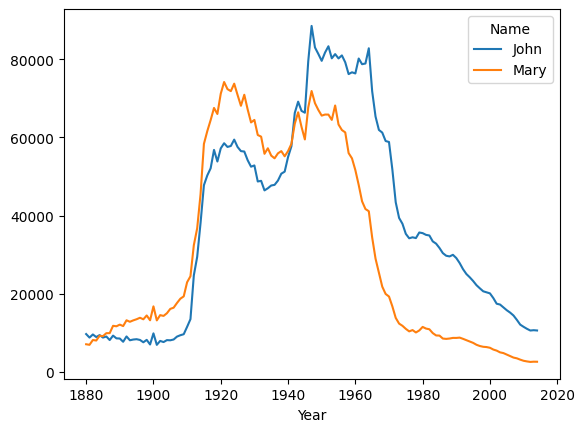

In [21]:
df = names_df[names_df['Name'].isin(['Mary', 'John'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
df.plot()

plt.show()

### Task 26. Plot the distribution graphs of the number of female names John and male names Mary by year

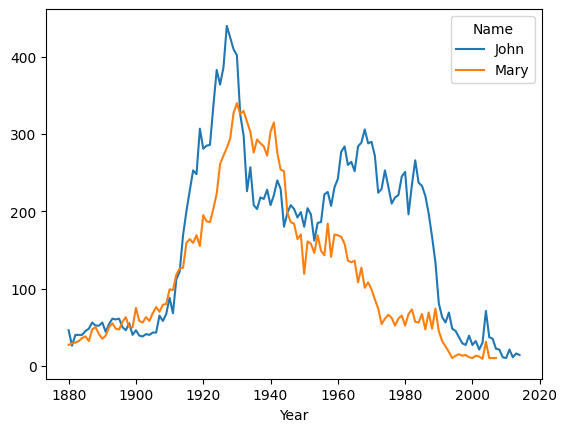

In [22]:
df = names_df.query('(Name == "Mary" and Gender == "M") or (Name == "John" and Gender == "F")')
df = df.groupby(['Year', 'Name'])['Count'].sum().unstack()
df.plot()

plt.show()

### Task 27. Find the most popular names in each year

In [23]:
indexes = names_df.groupby('Year')['Count'].idxmax()
names_df.loc[indexes, ['Year', 'Name', 'Count']].set_index('Year')

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
